# Imports

In [ ]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install stanza


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=f730d48487bcc390a994c284dbfa622c439253630baee24366328de96c58b5e1
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Data source

In [ ]:
df = pd.read_csv('all_parsed_graph.csv')
df = df.query('name != "себя"').reset_index().drop(columns='index')
df = df[['id', 'task_num',
       'task_text', 'dept', 'task_responsibles_people', 'task_deadline',
       'position', 'name', 'global_deadline', 'Tasks']]
df.head()

,id,task_num,task_text,dept,task_responsibles_people,task_deadline,position,name,global_deadline,Tasks
0,0,Task1,Закупить книги. Срок завершения: 19 апр 15.,Административно-хозяйственный отдел,Ответственность за исполнение распоряжения воз...,2015-04-18,специалист первый категория административно-хо...,кравцов и.е.,2013-04-10,NaN
1,1,Task1,Провести анализ поставщиков для замены вышедше...,Служба ИТ,Ответственность за исполнение распоряжения воз...,2012-10-23,специалист третий категория служба ит,ким юрий иванович,2013-06-02,NaN
2,1,Task2,Выполнить ремонт кабеля сети передачи данных м...,Служба ИТ,Контроль над выполнением приказа возложить на ...,2013-08-11,системный администратор,сергеев андрей,2013-06-02,NaN
3,1,Task3,Создать и настроить виртуальную машину в соотв...,Служба ИТ,Контроль над исполнением распоряжения оставить...,2019-09-09,специалист третий категория,ким юрий иванович,2013-06-02,NaN
4,2,Task1,Провести рефакторинг программного обеспечения ...,Отдел разработки систем,Контроль над исполнением распоряжения оставить...,2020-12-23,контроль над исполнение распоряжение,абаимов симон,2014-10-07,NaN


In [ ]:
z = df.position.value_counts()
df

,id,task_num,task_text,dept,task_responsibles_people,task_deadline,position,name,global_deadline,Tasks
0,0,Task1,Закупить книги. Срок завершения: 19 апр 15.,Административно-хозяйственный отдел,Ответственность за исполнение распоряжения воз...,2015-04-18,специалист первый категория административно-хо...,кравцов и.е.,2013-04-10,0.0
1,1,Task1,Провести анализ поставщиков для замены вышедше...,Служба ИТ,Ответственность за исполнение распоряжения воз...,2012-10-23,специалист третий категория служба ит,ким юрий иванович,2013-06-02,0.0
2,1,Task2,Выполнить ремонт кабеля сети передачи данных м...,Служба ИТ,Контроль над выполнением приказа возложить на ...,2013-08-11,системный администратор,сергеев андрей,2013-06-02,0.0
3,1,Task3,Создать и настроить виртуальную машину в соотв...,Служба ИТ,Контроль над исполнением распоряжения оставить...,2019-09-09,специалист третий категория,ким юрий иванович,2013-06-02,0.0
4,2,Task1,Провести рефакторинг программного обеспечения ...,Отдел разработки систем,Контроль над исполнением распоряжения оставить...,2020-12-23,контроль над исполнение распоряжение,абаимов симон,2014-10-07,0.0
...,...,...,...,...,...,...,...,...,...,...
2864,623,Task3,Провести ремонт входной двери. Выполнить данно...,Административно-хозяйственный отдел,Ответственным за контролем над исполнением выш...,2015-06-14,специалист первый категория административно-хо...,кравцов и.е.,2014-03-17,0.0
2865,623,Task4,Устранить засор на кухне. Выполнить данное пор...,Административно-хозяйственный отдел,Ответственность за исполнение распоряжения воз...,2015-05-18,руководитель административно-хозяйственный отдел,с.с.галкин,2014-03-17,0.0
2866,623,Task5,Провести опрос сотрудников. Срок завершения: 0...,Административно-хозяйственный отдел,Контроль над выполнением настоящего приказа во...,2014-07-06,специалист первый категория административно-хо...,кравцов и.е.,2014-03-17,0.0
2867,623,Task6,Согласовать места установки камер видеонаблюде...,Административно-хозяйственный отдел,За контроль над исполнением распоряжения назна...,2015-04-08,руководитель административно-хозяйственный отдел,с.с.галкин,2014-03-17,0.0


In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian") 

def Convert(string): 
    li = list(string.split(" ")) 
    return li 

def stem(text):
  my_words = Convert(text)
  l = []
  for word in my_words:
    if word != "специалист":
        l.append(stemmer.stem(word))
  return " ".join(l)

'специалист трет категор'

In [ ]:
df['position'] = df.apply(lambda x: stem(x['position']), axis=1)

In [ ]:
df['position']

0       специалист перв категор административно-хозяйс...
1                        специалист трет категор служб ит
2                                   системн администратор
3                                 специалист трет категор
4                             контрол над исполн распоряж
                              ...                        
2864    специалист перв категор административно-хозяйс...
2865           руководител административно-хозяйств отдел
2866    специалист перв категор административно-хозяйс...
2867           руководител административно-хозяйств отдел
2868           руководител административно-хозяйств отдел
Name: position, Length: 2869, dtype: object

# Data cleaning

In [ ]:
df.fillna(0, inplace = True)
df.replace('None', 0, inplace = True)


In [ ]:
import stanza
from stanza.models.common.doc import Document

nlp = stanza.Pipeline(lang='ru', processors='tokenize,lemma', lemma_pretagged=True, tokenize_pretokenized=True)
doc = nlp('специалист третий категория')
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')



INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| lemma     | syntagrus |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [ ]:
doc = nlp('специалист третий категория')
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')


word: специалист 	lemma: специалист
word: третий 	lemma: третий
word: категория 	lemma: категория


In [ ]:
#df.position = df.position.apply

# EDA

In [ ]:
# some basic stats

documents = df['id'].unique()
departments = df['dept'].unique()
employees = df['name'].unique()
positions = df['position'].unique()


print('Number of docs:', len(documents))
print('Number of depts in the company:', len(departments) )
print('Number of employees in the company:', len(employees))
print('Number of positions in the company total:', len(positions))

Number of docs: 620
Number of depts in the company: 8
Number of employees in the company: 59
Number of positions in the company total: 62


## How many documents was analyzed?

In [ ]:
print(documents)

[0.]


## Company departments

In [ ]:
print(departments)

['Служба ИТ' 'Отдел разработки систем' 'Бухгалтерия'
 'Отдел проектирования' 'Административно-хозяйственный отдел'
 'Отдел архитектуры' 'Отдел эксплуатации']


## Employees

In [ ]:
print(employees)

['ким юрий иванович' 'сергеев андрей' 'абаимов симон' 'абаимов симона'
 'абашкин орест' 'абалкин зураб' 'андреев с.е.' 'александров а.с.'
 'смирнов о.а.' 'шихов' 'семёнов и.а.' 'шихов р.п.' 'семёнов м.с.'
 'попов а.а.' 'абакуловый пётр' 'абалаково севастьян' 'попов и.и.'
 'коптеловый е.в' 'кравцов и.е.' 'с.с.галкин' 'сергеев ален иванович'
 'слесарев а.в' 'абатуров борис' 'миронов к.а.' 'симоново н.с.'
 'абаковый алексей' 'никишин с.е.' 'абашичев алексей' 'поспелов н.а.'
 'миронов т.п.' 'миронов' 'семёнов' 'кравцов' 'ведерников и.с.'
 'жуков а.в' 'точновый' 'иванов а.а.' 'р.е.артюхин'
 'александров александр иванович' 'абалаковый севастьян' 'абалдуев олег'
 'петров в.м.' 'никитин ирина петрович' 'андреев к.с.' 'абалакин михаил'
 'сергеев алёна иванович' 'петров' 'абакумов глеб' 'абаков алексей']


# Graph

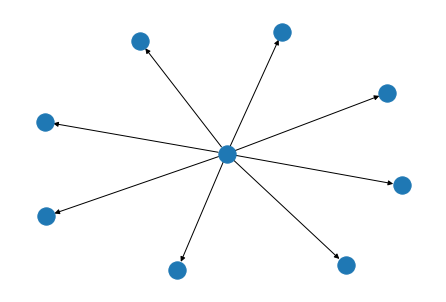

In [ ]:
DG = nx.DiGraph()

comp_name = 'URFU_COMP'

for i in list(departments):
    DG.add_edge(comp_name, i)
    

nx.draw(DG)


## Graph styles

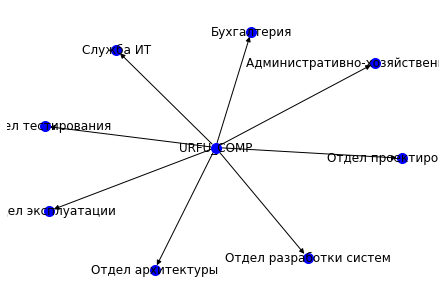

In [ ]:
options = {'node_color': 'blue', 'edge_color' : 'black', 'node_size': 50, 'with_labels' : True, 'width': 3, 'node_size' : 100, 'width': 1}
pos=nx.spring_layout(DG)

nx.draw(DG,pos=pos,**options)


## Multilevel graph

In [ ]:

# create a graph object
G = nx.Graph()

comp_name = 'COMPANY'

for z in list(departments):
    G.add_edge(comp_name, z)
    # iterate through the rows of the DataFrame
    for i, row in df.iterrows():
        # add task_responsibles_groups node
        dept = row["dept"]
        G.add_node(dept, size=df["dept"].value_counts()[dept])
        # add position node
        position = row["position"]
        G.add_node(position, size=df["position"].value_counts()[position])
        # add name node
        name = row["name"]
        G.add_node(name, size=df["name"].value_counts()[name])
        # add edges between task_responsibles_groups and position
        G.add_edge(dept, position)
        # add edges between position and name
        G.add_edge(position, name)

# draw the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
pos = nx.spring_layout(G) # use spring layout to calculate node positions

# create a list of node sizes
node_sizes = []
for node in G.nodes():
    node_sizes.append(G.degree(node)*50)

# create a list of node colors
node_colors = []
for node in G.nodes():
    if node in departments:
        node_colors.append("orange")
    elif node in df["position"].unique():
        node_colors.append("green")
    elif node in df["name"].unique():
        node_colors.append("purple")
    else:
        node_colors.append("red")

# create a list of edge colors
edge_colors = []
for edge in G.edges():
    if edge[0] in departments:
        edge_colors.append("orange")
    elif edge[0] in df["position"].unique():
        edge_colors.append("green")
    elif edge[0] in df["name"].unique():
        edge_colors.append("purple")
    else:
        edge_colors.append("red")

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color=edge_colors)


# Graph finding paths

In [ ]:
results = []
for n1 in G.nodes():
    for n2 in G.nodes():
        shortest_path = nx.single_source_dijkstra(G, source=n1, target=n2)
        results.append(shortest_path)


In [ ]:
shortest_path = nx.single_source_dijkstra(G, source='ведерников и.с.', target='COMPANY')
print(shortest_path)


(3, ['ведерников и.с.', 'специалист втор категор отдел эксплуатац', 'Отдел эксплуатации', 'COMPANY'])


# SPACY

In [ ]:
!python -m spacy download ru_core_news_lg


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-18 20:28:01.552577: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=9128e607d502514046bdb83cc16ad1846cd22732e6045f1441bfe9959ff4b9c9
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
✔ Download and installation 

In [ ]:
import spacy
nlp = spacy.load('ru_core_news_lg')


In [ ]:

!tar -xvf  'docx.tar' -C '/content'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Parsing text from docx files

In [ ]:
!pip install --upgrade python-docx


In [ ]:
import os
import docx 

all_text = []
file_names = []

path_normalized = os.path.normpath("/content/docx")
for dirpath, dirnames, filenames in os.walk(path_normalized):
    for file in filenames:
        file_names.append(int(file.rstrip('.docx')))
        text_doc = []
        doc = docx.Document(os.path.normpath(path_normalized + "/" + file))
        for par in doc.paragraphs:
            if par.text != "":
                text_doc.append(par.text)
        txt = '\n'.join(text_doc)
        all_text.append(txt)
docx_df = pd.DataFrame({"id": file_names, "text": all_text}, columns=["id", "text"])
docx_df.set_index('id', inplace=True)


In [ ]:
import re

def clear_text(x):
    txt = ""
    s = re.sub("\s+", " ", x)
    doc = nlp(s)
    for entity in doc:
      res = entity.lemma_
      txt += (" " + res)
    return txt

s = 'Провести опрос сотрудников. Срок завершения: '

clear_text(s)

' провести опрос сотрудник . срок завершение :'

Applying cleaning function to combined docx df

In [ ]:
docx_df["clear_text"] = docx_df["text"].apply(lambda x: clear_text(x))


# Helper functions

In [ ]:
shortest_path = nx.single_source_dijkstra(G, source='ведерников и.с.', target='COMPANY')
print(shortest_path)

Is a given person works in the company

In [ ]:
def is_employee(graph, company, name):
  try:
    shortest_path = nx.single_source_dijkstra(G, source=company, target=name)
    print(shortest_path)
    if shortest_path[0] == 3 and shortest_path[1][-1] == name:
      return True
    else:
      return False
  except:
    return False

is_employee(G, 'COMPANY', 'ведерников и.с.')

In [ ]:
is_employee(G, 'COMPANY', 'абатуров борис')

Is a given person works in the company

In [ ]:
def is_employee_to_dept(graph, company, dept, name):
  try:
    shortest_path = nx.single_source_dijkstra(G, source=company, target=name)
    print(shortest_path)
    if shortest_path[0] == 3 and shortest_path[1][1] == dept:
      return True
    else:
      return False
  except:
    return False


is_employee_to_dept(G, 'COMPANY', 'Отдел эксплуатации', 'ведерников и.с.')

In [ ]:
is_employee_to_dept(G, 'COMPANY', 'Отдел эксплуатации', 'абатуров борис')

In [ ]:
results = []
for n1 in G.nodes():
    for n2 in G.nodes():
        shortest_path = nx.single_source_dijkstra(G, source=n1, target=n2)
        results.append(shortest_path)


In [ ]:
[x for x in results if x[0] != 3]